In [1]:
#Dependencies and Setup

import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pathlib import Path

In [2]:
#CSV File to Load

train_data = Path("Resources/train.csv")

#Read the CSV File
train = pd.read_csv(train_data,delimiter = ";")

#Display the data
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
#Clean the Data by Making a New Dataframe with columns Age, Job, Marital, Education , Housing, Loan, Balance & last columns (Y)
train_df = train.loc[:,["age","job","marital","education","housing","loan","balance","y"]]
train_df.head()

#Drop the column name Default, Contact, Campaign,pdays, Previous,poutcome

,age,job,marital,education,housing,loan,balance,y
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [4]:
#Rename the columns name 

train_data_df = train_df.rename(columns={"age":"Age","job":"Job","marital":"Marital_Status","education":"Education",
                                         "housing":"Housing","loan":"Loan","balance":"Balance","y":"Outcome"})

train_data_df.head()

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
3,47,blue-collar,married,unknown,yes,no,1506,no
4,33,unknown,single,unknown,no,no,1,no


In [ ]:
#checking for missing Data
train_data_df.count()

# Data Cleaning

In [6]:
#Cleaning the data by removing unknown category from Job and Education column
train_data_clean=train_data_df[train_data_df['Job']!='unknown'].loc[train_data_df['Education']!='unknown']
train_data_clean.reset_index()

,index,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,0,58,management,married,tertiary,yes,no,2143,no
1,1,44,technician,single,secondary,yes,no,29,no
2,2,33,entrepreneur,married,secondary,yes,yes,2,no
3,5,35,management,married,tertiary,yes,no,231,no
4,6,28,management,single,tertiary,yes,yes,447,no
...,...,...,...,...,...,...,...,...,...
43188,45206,51,technician,married,tertiary,no,no,825,yes
43189,45207,71,retired,divorced,primary,no,no,1729,yes
43190,45208,72,retired,married,secondary,no,no,5715,yes
43191,45209,57,blue-collar,married,secondary,no,no,668,no


In [7]:
#Checking for the age range of the participant 
min_age=train_data_clean['Age'].min()
max_age=train_data_clean['Age'].max()

print(f'The participant age ranges from {min_age}years to {max_age}years')

The participant age ranges from 18years to 95years


In [8]:
#making a copy of the data 
train_df_copy=train_data_clean.copy()
train_df_copy

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome
0,58,management,married,tertiary,yes,no,2143,no
1,44,technician,single,secondary,yes,no,29,no
2,33,entrepreneur,married,secondary,yes,yes,2,no
5,35,management,married,tertiary,yes,no,231,no
6,28,management,single,tertiary,yes,yes,447,no
...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,825,yes
45207,71,retired,divorced,primary,no,no,1729,yes
45208,72,retired,married,secondary,no,no,5715,yes
45209,57,blue-collar,married,secondary,no,no,668,no


In [9]:
#adding age range to the Dataframe
size_bin=[0,18,35,60,100]
labels=['Teenager','Youth','Adult','Old Adult']

#categorize the age based on the bin
train_df_copy['Age Category']=pd.cut(train_df_copy['Age'],size_bin,labels=labels)
train_df_copy

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome,Age Category
0,58,management,married,tertiary,yes,no,2143,no,Adult
1,44,technician,single,secondary,yes,no,29,no,Adult
2,33,entrepreneur,married,secondary,yes,yes,2,no,Youth
5,35,management,married,tertiary,yes,no,231,no,Youth
6,28,management,single,tertiary,yes,yes,447,no,Youth
...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,825,yes,Adult
45207,71,retired,divorced,primary,no,no,1729,yes,Old Adult
45208,72,retired,married,secondary,no,no,5715,yes,Old Adult
45209,57,blue-collar,married,secondary,no,no,668,no,Adult


In [10]:
#adding Balance range to the Dataframe
size_bin=[-9000,0,500,2000,10000,100000,105000]
labels=["Negative balance",'<\$500',"\$500-$2000",'\$2000-$10000','\$10000-$100000','\$100000+']

#categorize the age based on the bin
train_df_copy['Balance Category']=pd.cut(train_df_copy['Balance'],size_bin,labels=labels)
train_df_copy

,Age,Job,Marital_Status,Education,Housing,Loan,Balance,Outcome,Age Category,Balance Category
0,58,management,married,tertiary,yes,no,2143,no,Adult,\$2000-$10000
1,44,technician,single,secondary,yes,no,29,no,Adult,<\$500
2,33,entrepreneur,married,secondary,yes,yes,2,no,Youth,<\$500
5,35,management,married,tertiary,yes,no,231,no,Youth,<\$500
6,28,management,single,tertiary,yes,yes,447,no,Youth,<\$500
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,no,825,yes,Adult,\$500-$2000
45207,71,retired,divorced,primary,no,no,1729,yes,Old Adult,\$500-$2000
45208,72,retired,married,secondary,no,no,5715,yes,Old Adult,\$2000-$10000
45209,57,blue-collar,married,secondary,no,no,668,no,Adult,\$500-$2000


In [11]:
#get how many participant belongs to each job category
job_category=train_df_copy['Job'].value_counts()

#get how many participant belongs to each Education category
education_category=train_df_copy['Education'].value_counts()

print(education_category)
job_category

secondary    23131
tertiary     13262
primary       6800
Name: Education, dtype: int64


blue-collar      9278
management       9216
technician       7355
admin.           5000
services         4004
retired          2145
self-employed    1540
entrepreneur     1411
unemployed       1274
housemaid        1195
student           775
Name: Job, dtype: int64

In [12]:
#calculate the outcome based on Age category and the type of Job.
job_age_category_outcome=train_df_copy.groupby('Outcome')[['Age Category','Job']]
job_age_category_outcome.value_counts()

Outcome  Age Category  Job          
no       Adult         blue-collar      5449
                       management       4876
                       technician       3727
         Youth         blue-collar      3136
                       management       3032
                                        ... 
yes      Teenager      management          0
                       retired             0
                       self-employed       0
                       services            0
                       admin.              0
Length: 88, dtype: int64

In [13]:
#grouping our Data based on the outcome
#Sccessful outcom
train_data_df_success=train_df_copy[train_df_copy['Outcome']=='yes']

#failed outcome
train_data_df_failed=train_df_copy[train_df_copy['Outcome']=='no']

In [14]:
#showing the outcome based on Education level
edu_level_outcome=train_df_copy.groupby('Education')['Outcome'].value_counts()
edu_level_outcome

Education  Outcome
primary    no          6212
           yes          588
secondary  no         20690
           yes         2441
tertiary   no         11270
           yes         1992
Name: Outcome, dtype: int64

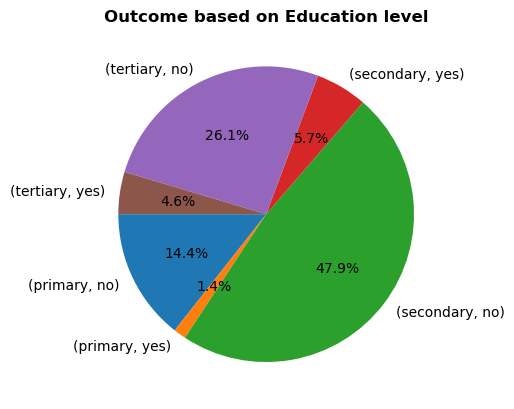

In [15]:
# Generate a pie plot showing the outcome based on Education level
pie_plot_edu =edu_level_outcome.plot(kind="pie",autopct='%1.1f%%',startangle=180)

#set both x and y labels
pie_plot_edu.set_title(label='Outcome based on Education level', fontweight = 'bold')
pie_plot_edu.set_ylabel('')

plt.show()

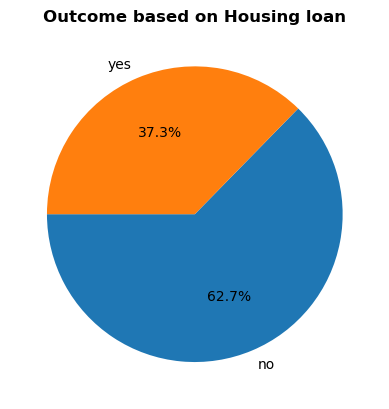

In [16]:
housing_loan=train_data_df_success['Housing'].value_counts()

pie_plot_housing_loan = housing_loan.plot(kind="pie",autopct='%1.1f%%',startangle=180)

#set both x and y labels
pie_plot_housing_loan.set_title(label='Outcome based on Housing loan', fontweight = 'bold')
pie_plot_housing_loan.set_ylabel('')

plt.show()
# housing_loan

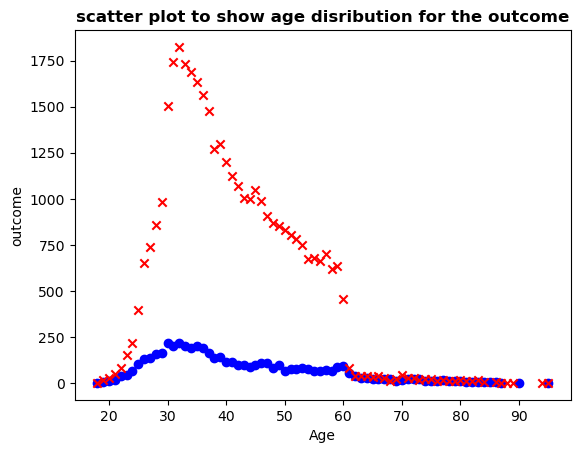

In [17]:
# A scatter plot to show age disribution for the outcome
age_chart_df_success=train_data_df_success['Age'].value_counts()
age_chart_df_failed=train_data_df_failed['Age'].value_counts()

plt.scatter(age_chart_df_success.keys(),age_chart_df_success, c='b',marker="o")
plt.scatter(age_chart_df_failed.keys(),age_chart_df_failed, c='r',marker="x")
plt.title('scatter plot to show age disribution for the outcome', fontweight='bold')
plt.ylabel('outcome')
plt.xlabel('Age')

plt.show()

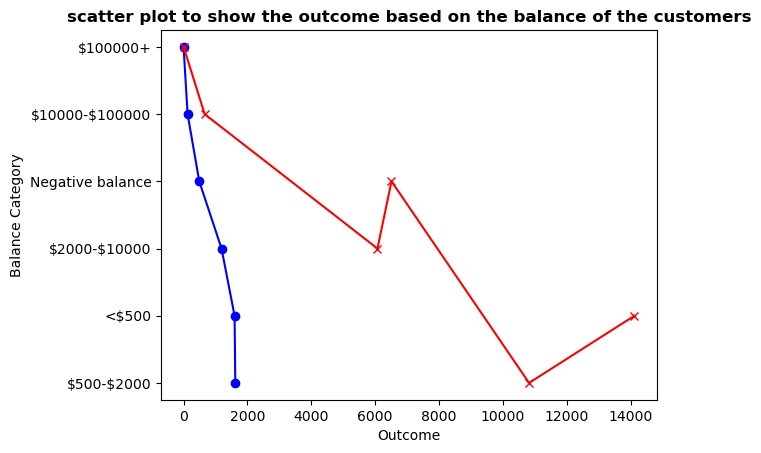

In [18]:
# A scatter plot to show the outcome based on the balance of the customers
balance_chart_df_success=train_data_df_success['Balance Category'].value_counts()
balance_chart_df_failed=train_data_df_failed['Balance Category'].value_counts()

plt.plot(balance_chart_df_success,balance_chart_df_success.keys(), c='b', marker='o')
plt.plot(balance_chart_df_failed,balance_chart_df_failed.keys(), c='r',marker="x")
plt.title('scatter plot to show the outcome based on the balance of the customers', fontweight='bold')
plt.ylabel('Balance Category' )
plt.xlabel('Outcome')

plt.show()

In [19]:
new_group=train_df_copy.groupby('Age')[['Balance','Job']]
new_group.head()

,Balance,Job
0,2143,management
1,29,technician
2,2,entrepreneur
5,231,management
6,447,management
...,...,...
43315,1817,retired
43332,1503,retired
44669,648,retired
44794,433,retired


The correlation between Age and Balance for the successful outcome is 0.12


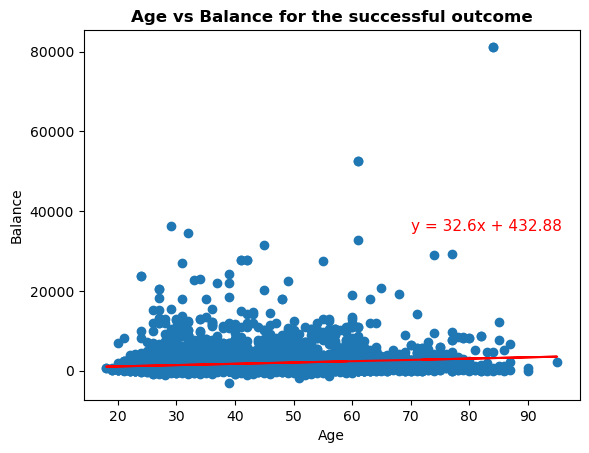

In [20]:
# Showing the correlation coefficient and a linear regression model 
# for Age and Balance for the successful outcome
x_values = train_data_df_success['Age']
y_values = train_data_df_success['Balance']


# Calculate the correlation
correlation = round(st.pearsonr(x_values,y_values)[0],2)

# Calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Gernerate scatter chart with liner regression line, equation of line, r-squared value
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, 'r-')

# Plot the Annotation in the graph 
plt.annotate(line_eq,(70,35000),fontsize=11,color="red")

# Define title and x/y labels
plt.title('Age vs Balance for the successful outcome', fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Balance')

print(f'The correlation between Age and Balance for the successful outcome is {correlation}')
plt.show()